In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mail-data/mail_data.csv


In [3]:
data = pd.read_csv("/kaggle/input/mail-data/mail_data.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [6]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
data = data.where((pd.notnull(data)), '')

In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
data.shape

(5572, 2)

In [10]:
data['Category'] = data['Category'].map({'spam': 0, 'ham': 1})

In [11]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

In [15]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
X = data['Message']
Y = data['Category']

In [19]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [20]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(4457,)
(4457,)


In [23]:
print(X_test.shape)
print(y_test.shape)

(1115,)
(1115,)


In [25]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", binary=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [27]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [28]:
X_train

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object

In [29]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34840 stored elements and shape (4457, 7440)>
  Coords	Values
  (0, 5818)	0.22682143517864364
  (0, 2497)	0.2442158912653505
  (0, 694)	0.3171299579602537
  (0, 6264)	0.1898892037332199
  (0, 5800)	0.17558937755823417
  (0, 3262)	0.33791755486732394
  (0, 2049)	0.3034375179183143
  (0, 7300)	0.24288153842988894
  (0, 2724)	0.3544175987866074
  (0, 354)	0.3544175987866074
  (0, 7162)	0.2550284465664535
  (0, 258)	0.2379428657041507
  (0, 7222)	0.2173884735352799
  (0, 5512)	0.1898892037332199
  (1, 2555)	0.3840709491751004
  (1, 3804)	0.1902902346515268
  (1, 3932)	0.24325511357721427
  (1, 4509)	0.4028245991060671
  (1, 2440)	0.33870544648398715
  (1, 3333)	0.20665394084233096
  (1, 5650)	0.360444144470318
  (1, 2335)	0.2162321275166079
  (1, 6738)	0.28986069568918
  (1, 6109)	0.3239762634465801
  (1, 3267)	0.2678713077029217
  :	:
  (4452, 2438)	0.4574160733416501
  (4452, 7280)	0.3968991650168732
  (4452, 3978)	0.457416073

In [30]:
print(X_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7616 stored elements and shape (1115, 7440)>
  Coords	Values
  (0, 4942)	0.27552235188443686
  (0, 4100)	0.3392428284838497
  (0, 3955)	0.3774291665065587
  (0, 3395)	0.402169324846608
  (0, 3225)	0.402169324846608
  (0, 2173)	0.30145841567028486
  (0, 2065)	0.36113324080559445
  (0, 1751)	0.34896165336060586
  (1, 7158)	0.3981347747267476
  (1, 6986)	0.2493471978387002
  (1, 6642)	0.326271353777915
  (1, 6544)	0.2204999931204713
  (1, 5430)	0.387052012561607
  (1, 4044)	0.3234324946551934
  (1, 3443)	0.3234324946551934
  (1, 1975)	0.3578586983359201
  (1, 1361)	0.37034060973735533
  (2, 6570)	0.3042743325149729
  (2, 5597)	0.43828336765880876
  (2, 4369)	0.4230992819157864
  (2, 3510)	0.4016985150384895
  (2, 3084)	0.21988546741069176
  (2, 3067)	0.21988546741069176
  (2, 2377)	0.4230992819157864
  (2, 1292)	0.3150204452887917
  :	:
  (1110, 6142)	0.22937745257301317
  (1110, 5204)	0.2537606265072484
  (1110, 4806)	0.261496

In [31]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_features, y_train)

LogisticRegression()

In [34]:
prediction_test_data = logreg_model.predict(X_test_features)
accuracy_test_score = accuracy_score(y_test, prediction_test_data)

In [35]:
print("Accuracy on test data", accuracy_test_score)

Accuracy on test data 0.9659192825112107


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
accuracy_test_score = accuracy_score(y_test, prediction_test_data)
precision_test_score = precision_score(y_test, prediction_test_data)
recall_test_score = recall_score(y_test, prediction_test_data)
f1_test_score = f1_score(y_test, prediction_test_data)

In [49]:
print("Accuracy on test data", accuracy_test_score)
print("Precision on test data", precision_test_score)
print("Recall on test data", recall_test_score)
print("F1-Score on test data", f1_test_score)

Accuracy on test data 0.9659192825112107
Precision on test data 0.9621513944223108
Recall on test data 1.0
F1-Score on test data 0.9807106598984772


In [37]:
conf_matrix = confusion_matrix(y_test, prediction_test_data)
print(conf_matrix)

[[111  38]
 [  0 966]]


Text(0.5, 23.52222222222222, 'Predicted label')

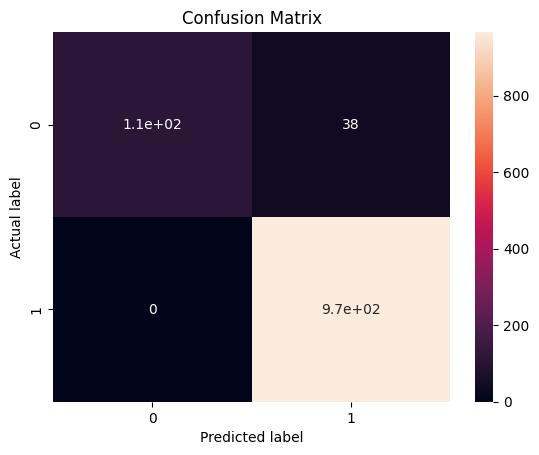

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame(conf_matrix), annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [42]:
input_user_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

input_data_features = feature_extraction.transform(input_user_mail)

prediction = logreg_model.predict(input_data_features)

if prediction[0] == 1:
    print("This is a ham mail")
else:
    print("This is a spam mail")

This is a spam mail


In [44]:
import pickle
pickle.dump(logreg_model, open("logistic_regression.pkl", "wb"))
pickle.dump(feature_extraction, open("feature_extraction.pkl", "wb"))

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm

In [52]:
support_vec_model = svm.SVC()
support_vec_model.fit(X_train_features, y_train)

SVC()

In [53]:
prediction_test_data = support_vec_model.predict(X_test_features)

In [54]:
accuracy_test_score = accuracy_score(y_test, prediction_test_data)
precision_test_score = precision_score(y_test, prediction_test_data)
recall_test_score = recall_score(y_test, prediction_test_data)
f1_test_score = f1_score(y_test, prediction_test_data)

In [55]:
print("Accuracy on test data", accuracy_test_score)
print("Precision on test data", precision_test_score)
print("Recall on test data", recall_test_score)
print("F1-Score on test data", f1_test_score)

Accuracy on test data 0.9829596412556054
Precision on test data 0.9807106598984772
Recall on test data 1.0
F1-Score on test data 0.9902614044079959


In [56]:
conf_matrix = confusion_matrix(y_test, prediction_test_data)
print(conf_matrix)

[[130  19]
 [  0 966]]


Text(0.5, 23.52222222222222, 'Predicted label')

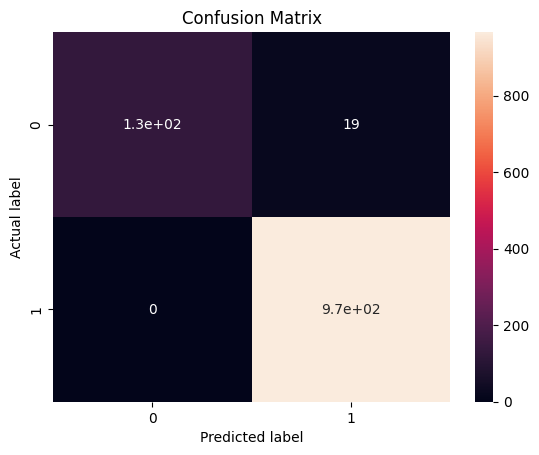

In [57]:
sns.heatmap(pd.DataFrame(conf_matrix), annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [58]:
input_user_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

input_data_features = feature_extraction.transform(input_user_mail)

prediction = support_vec_model.predict(input_data_features)

if prediction[0] == 1:
    print("This is a ham mail")
else:
    print("This is a spam mail")

This is a spam mail


In [60]:
decisiontree_model = DecisionTreeClassifier(min_samples_split=15)
decisiontree_model.fit(X_train_features, y_train)

DecisionTreeClassifier(min_samples_split=15)

In [61]:
prediction_test_data = decisiontree_model.predict(X_test_features)

In [62]:
accuracy_test_score = accuracy_score(y_test, prediction_test_data)
precision_test_score = precision_score(y_test, prediction_test_data)
recall_test_score = recall_score(y_test, prediction_test_data)
f1_test_score = f1_score(y_test, prediction_test_data)

In [63]:
print("Accuracy on test data", accuracy_test_score)
print("Precision on test data", precision_test_score)
print("Recall on test data", recall_test_score)
print("F1-Score on test data", f1_test_score)

Accuracy on test data 0.9641255605381166
Precision on test data 0.9734151329243353
Recall on test data 0.9855072463768116
F1-Score on test data 0.9794238683127572


In [64]:
stochasticgrad_model = SGDClassifier(loss='modified_huber', shuffle=True, random_state=42)
stochasticgrad_model.fit(X_train_features, y_train)

SGDClassifier(loss='modified_huber', random_state=42)

In [65]:
prediction_test_data = stochasticgrad_model.predict(X_test_features)

In [66]:
accuracy_test_score = accuracy_score(y_test, prediction_test_data)
precision_test_score = precision_score(y_test, prediction_test_data)
recall_test_score = recall_score(y_test, prediction_test_data)
f1_test_score = f1_score(y_test, prediction_test_data)

In [67]:
print("Accuracy on test data", accuracy_test_score)
print("Precision on test data", precision_test_score)
print("Recall on test data", recall_test_score)
print("F1-Score on test data", f1_test_score)

Accuracy on test data 0.9928251121076234
Precision on test data 0.992798353909465
Recall on test data 0.9989648033126294
F1-Score on test data 0.9958720330237358


In [69]:
mlp = MLPClassifier(max_iter=500, activation='tanh')
mlp.fit(X_train_features, y_train)

MLPClassifier(activation='tanh', max_iter=500)

In [70]:
prediction_test_data = stochasticgrad_model.predict(X_test_features)

In [71]:
accuracy_test_score = accuracy_score(y_test, prediction_test_data)
precision_test_score = precision_score(y_test, prediction_test_data)
recall_test_score = recall_score(y_test, prediction_test_data)
f1_test_score = f1_score(y_test, prediction_test_data)

In [72]:
print("Accuracy on test data", accuracy_test_score)
print("Precision on test data", precision_test_score)
print("Recall on test data", recall_test_score)
print("F1-Score on test data", f1_test_score)

Accuracy on test data 0.9928251121076234
Precision on test data 0.992798353909465
Recall on test data 0.9989648033126294
F1-Score on test data 0.9958720330237358
